# Final project scratchpad

## 1. Import ResNet50 model trained on VGGFace2 (from WeidiXie gihub)

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
import os

1) import code provided by VGGFace2 team @ https://drive.google.com/file/d/1AHVpuB24lKAqNyRRjhX7ABlEor6ByZlS/view
2) 


In [2]:
# import ResNet50 model trained on VGGFace2 dataset

# 2 options

In [3]:
# 1) import code provided by VGGFace2 team @ https://github.com/WeidiXie/Keras-VGGFace2-ResNet50
# %run "/jupyteruser/11332722/Keras-VGGFace2-ResNet50/src/config.py"
# %run "/jupyteruser/11332722/Keras-VGGFace2-ResNet50/src/model.py"
# %run "/jupyteruser/11332722/Keras-VGGFace2-ResNet50/src/resnet.py"
# %run "/jupyteruser/11332722/Keras-VGGFace2-ResNet50/src/utils.py"

In [4]:
# OR (NOTE DOESN"T SEEM TO WORK OUT OF THE BOX - SEE COMMENTS!!!)

# 2) import code provided by VGGFace2 team @ https://drive.google.com/file/d/1AHVpuB24lKAqNyRRjhX7ABlEor6ByZlS/view
# this link came from https://github.com/WeidiXie/Keras-VGGFace2-ResNet50 (in the Model section)
os.chdir(r"/jupyteruser/11332722/vggface2_Keras/src/")

%run "/jupyteruser/11332722/vggface2_Keras/tool/toolkits.py"
%run "/jupyteruser/11332722/vggface2_Keras/src/config.py"
%run "/jupyteruser/11332722/vggface2_Keras/src/resnet.py"
%run "/jupyteruser/11332722/vggface2_Keras/src/utils.py"
%run "/jupyteruser/11332722/vggface2_Keras/src/model.py" # commented out import new_layers
#%run "/jupyteruser/11332722/vggface2_Keras/src/predict.py" # commented out toolkits.initialize_GPU(args) but still didn't work

Using TensorFlow backend.


In [5]:
# load model weights obtained from https://drive.google.com/file/d/1AHVpuB24lKAqNyRRjhX7ABlEor6ByZlS/view
# this link came from https://github.com/WeidiXie/Keras-VGGFace2-ResNet50 (in the Model section)
model = Vggface2_ResNet50()

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
base_input (InputLayer)         (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        base_input[0][0]                 
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
__________________________________________________________________________________________________
max_poolin

In [7]:
# load pre-trained weights
weights_file = '/home/11332722/vggface2_Keras/model/resnet50_softmax_dim512/weights.h5'
model.load_weights(weights_file)

In [8]:
# create test input to see if model runs
lst = []
lst = np.zeros(shape=(1,224, 224, 3))
lst.shape

(1, 224, 224, 3)

(155, 136, 3)


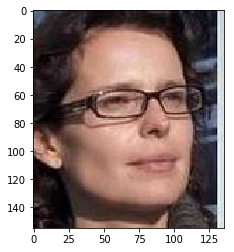

In [13]:
# load test image and take a look
test_file = '/jupyteruser/11332722/Keras-VGGFace2-ResNet50/samples (test set)/tight_crop (used for training)/n000106/0001_03.jpg'
test_img = imread(test_file,as_gray=False)
print(test_img.shape)
plt.imshow(test_img)

In [10]:
# add image to test batch
np.append(lst,np.array(load_data(test_file,(224,224))))
lst.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


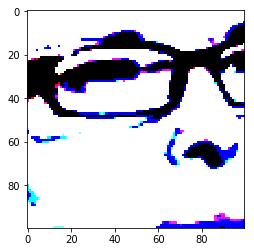

In [14]:
plt.imshow(load_data(test_file,(100,100)))

In [11]:
# run model
test = model.predict(lst)
test.shape

(1, 8631)

## 2. Modify model via Feature Extraction and Fine Tuning (former is a must, second is optional but worth trying)

A few useful references:<br/>

**Replacing layers**<br/>

https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751<br/>

https://www.tensorflow.org/alpha/tutorials/images/transfer_learning<br/>
* collab notebook at: 
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/images/transfer_learning.ipynb<br/>

https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/<br/>

https://github.com/tensorflow/tensorflow/issues/22479<br/>

**Similar project**<br/>

http://gigantes.ii.uam.es/fierrez/files/2018_CIARP_BiasFace_Acien.pdf

### 2.1 Feature Extraction (i.e. freeze convolutional base and add a new classification head)

In [ ]:
# 1) truncate model to obtain base
# 2) freeze base 
base_model.trainable = False

# check base_model
base_model.summary()

# 3) add classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

In [ ]:
prediction_layer = keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

In [ ]:
# chain layers
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
# compile updated model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# train model

In [ ]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples*weight/10
  for weight in SPLIT_WEIGHTS
)

In [ ]:
initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

In [ ]:
# check learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 2.2 Fine tuning (i.e. unfreeze based model and set set bottom layers to be un-trainable)

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch = initial_epochs,
                         validation_data=validation_batches)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()